## Loading and Visualizing Data

In [1]:
import numpy as np
import scipy.optimize
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [2]:
print("Loading and Visualizing Data ... \n")

data = loadmat('ex6data1.mat')

X = data['X']
y = data['y']

print(f'X : {X.shape}')
print(f'X : \n{X[:10,:]}\n')
print(f'y : {y.shape}')
print(f'y : \n{y[:10]}')


Loading and Visualizing Data ... 

X : (51, 2)
X : 
[[1.9643 4.5957]
 [2.2753 3.8589]
 [2.9781 4.5651]
 [2.932  3.5519]
 [3.5772 2.856 ]
 [4.015  3.1937]
 [3.3814 3.4291]
 [3.9113 4.1761]
 [2.7822 4.0431]
 [2.5518 4.6162]]

y : (51, 1)
y : 
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]


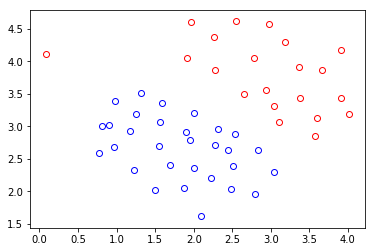

In [5]:
def plotData(X, y):

    pos = [i for i, _ in enumerate(y) if _ == 1]  # positive samples indices
    neg = [i for i, _ in enumerate(y) if _ == 0]  # negative samples indices
    
    plt.scatter(X[pos,0], X[pos,1], edgecolors='r', c='w')
    plt.scatter(X[neg,0], X[neg,1], edgecolors='b', c='w')

plotData(X, y)   